# Lockman SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_lockman-swire_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_lockman-swire_20171201.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


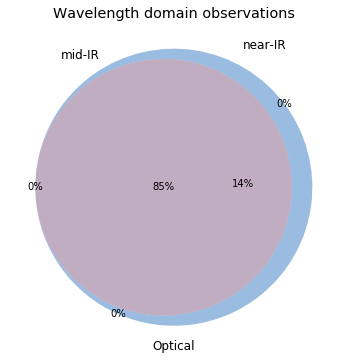

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

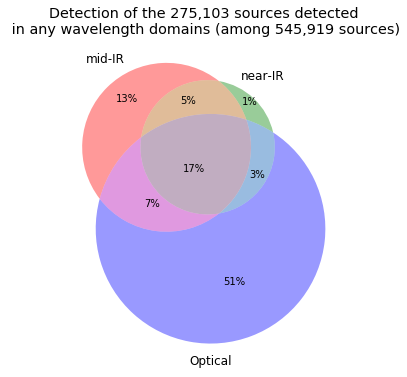

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["WFC u", "Megacam u"]
g_bands = ["WFC g", "Megacam g",  "GPC1 g"]
r_bands = ["WFC r", "Megacam r",  "GPC1 r"]
i_bands = ["WFC i", "Megacam i",  "GPC1 i"]
z_bands = ["WFC z", "Megacam z",  "GPC1 z"]
y_bands = [         "Megacam y",  "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

HELP warning: the column m_wfc_u (WFC u) is empty.


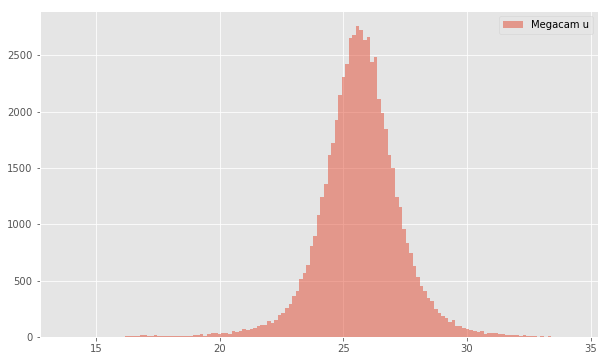

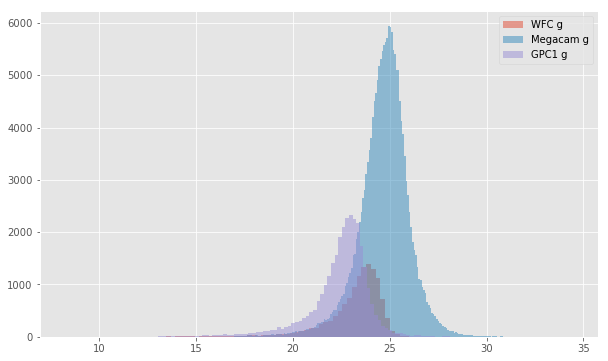

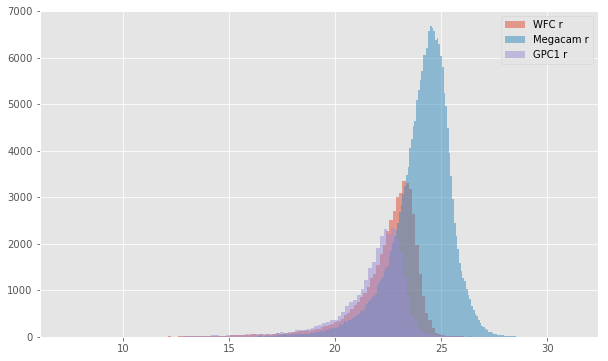

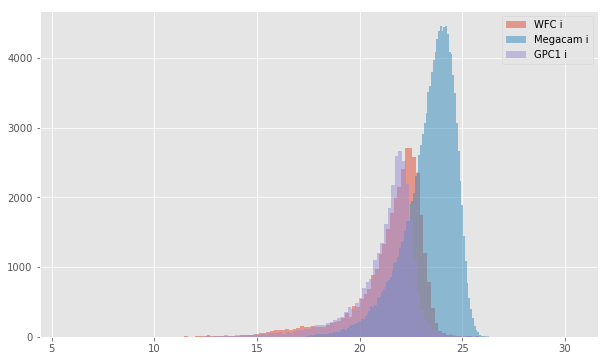

HELP warning: the column m_wfc_z (WFC z) is empty.


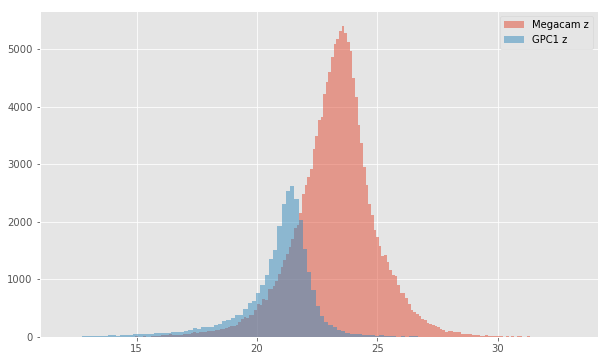

HELP warning: the column m_megacam_y (Megacam y) is empty.


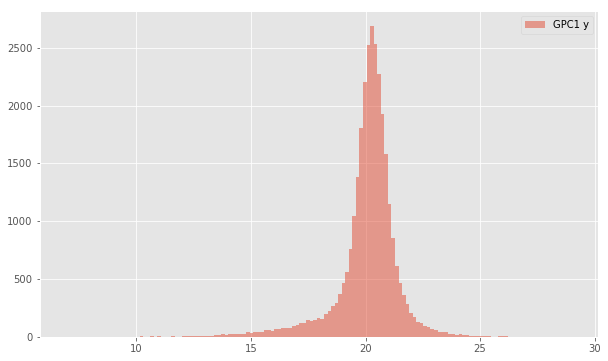

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

No sources have both WFC u (aperture) and Megacam u (aperture) values.
No sources have both WFC u (total) and Megacam u (total) values.
Megacam g (aperture) - WFC g (aperture):
- Median: 0.18
- Median Absolute Deviation: 0.17
- 1% percentile: -0.3721170806884766
- 99% percentile: 1.2495346260070765


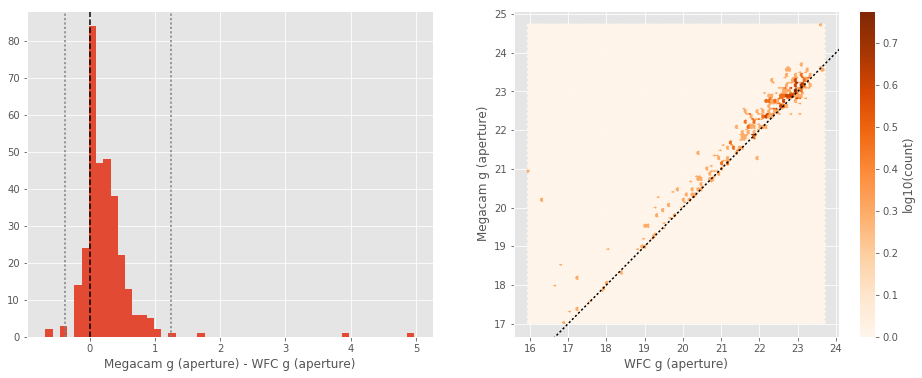

Megacam g (total) - WFC g (total):
- Median: -0.09
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9634849548339843
- 99% percentile: 0.9661866760253898


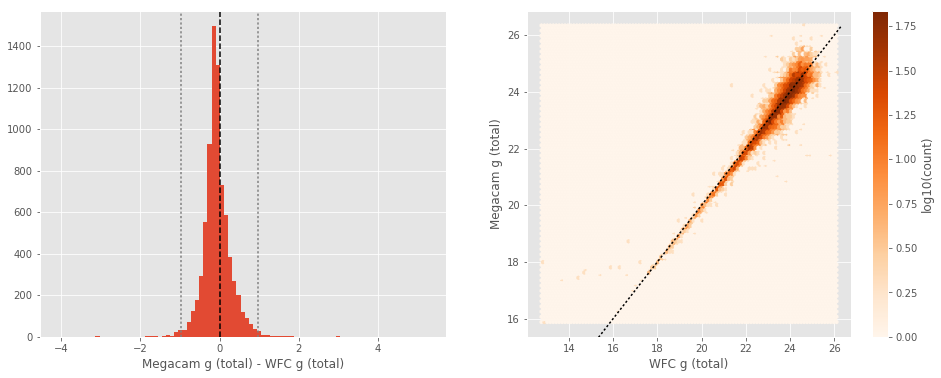

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.16
- 1% percentile: -1.1397904396057128
- 99% percentile: 1.3644761085510289


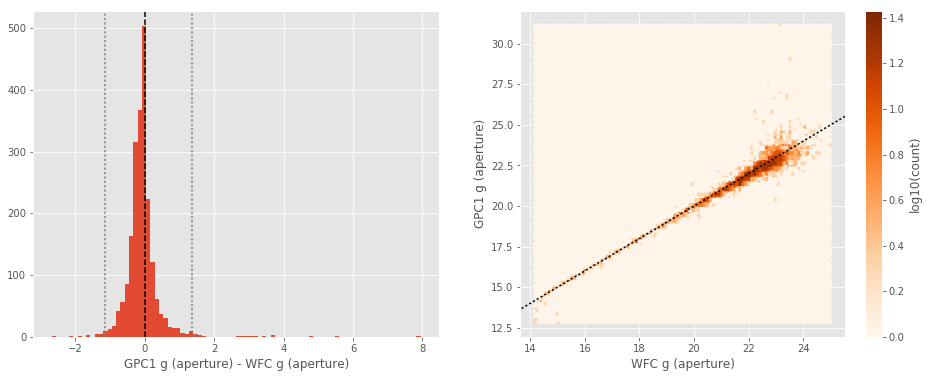

GPC1 g (total) - WFC g (total):
- Median: -0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -1.4387821388244628
- 99% percentile: 0.9639343070983926


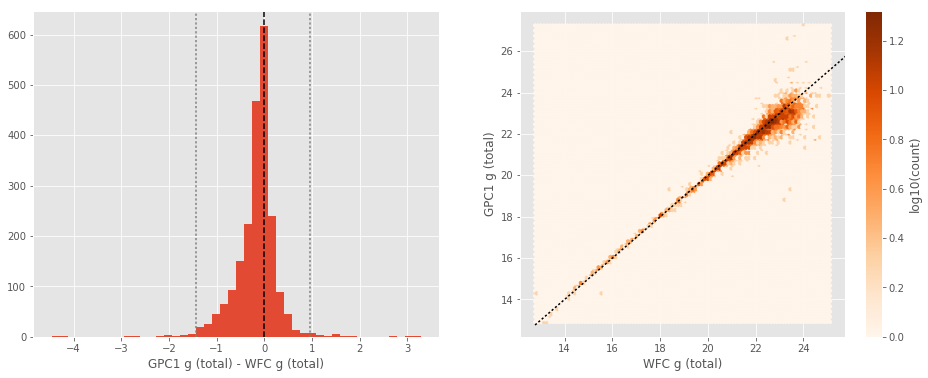

GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.35
- Median Absolute Deviation: 0.34
- 1% percentile: -2.8761429595947265
- 99% percentile: 1.9586801147460926


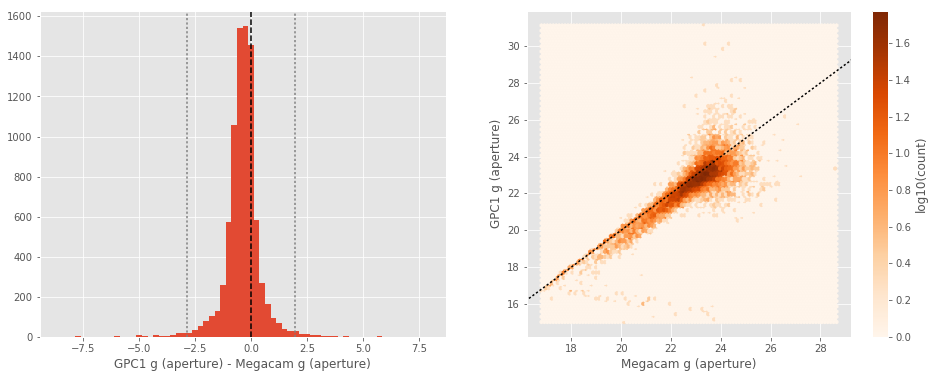

GPC1 g (total) - Megacam g (total):
- Median: 0.02
- Median Absolute Deviation: 0.24
- 1% percentile: -2.8741204833984373
- 99% percentile: 1.6935070610046403


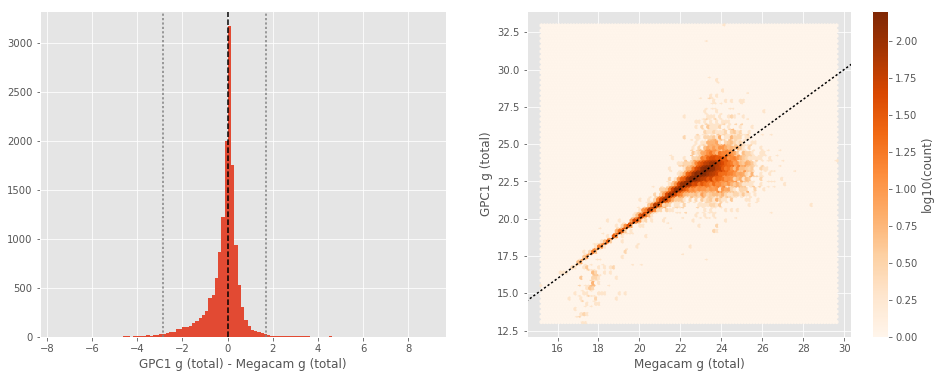

Megacam r (aperture) - WFC r (aperture):
- Median: 0.18
- Median Absolute Deviation: 0.14
- 1% percentile: -0.4613451385498047
- 99% percentile: 1.0706971740722673


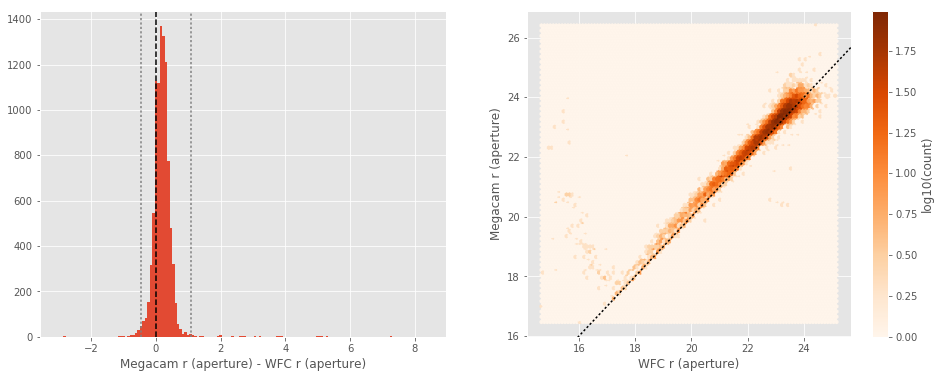

Megacam r (total) - WFC r (total):
- Median: -0.12
- Median Absolute Deviation: 0.14
- 1% percentile: -0.943126220703125
- 99% percentile: 0.969361305236817


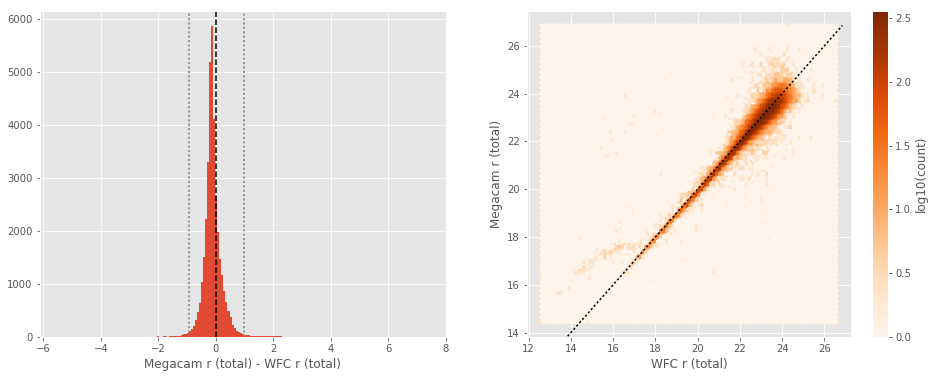

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1029310607910157
- 99% percentile: 1.0312171936035126


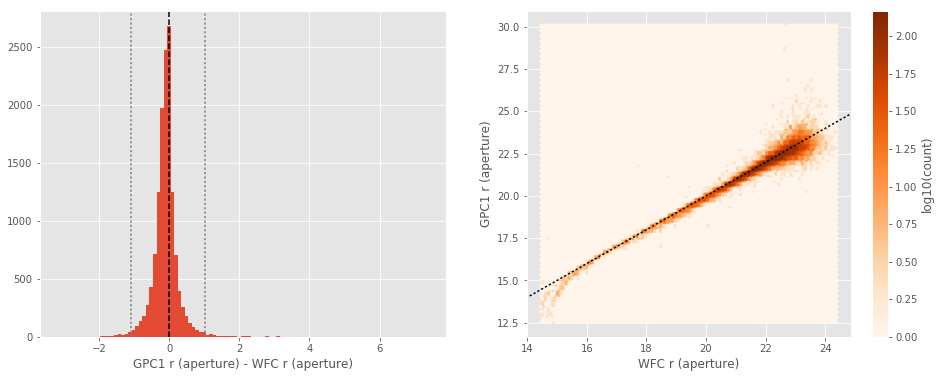

GPC1 r (total) - WFC r (total):
- Median: -0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -1.538095474243164
- 99% percentile: 0.9007681274414061


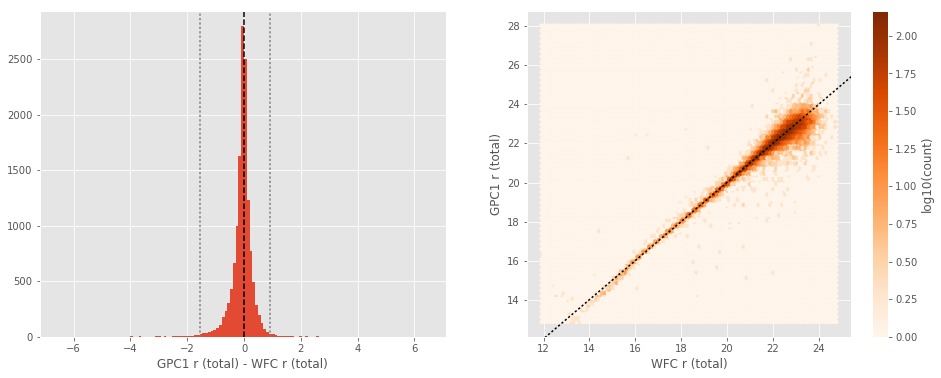

GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.30
- Median Absolute Deviation: 0.25
- 1% percentile: -2.4756964302062987
- 99% percentile: 0.964333629608155


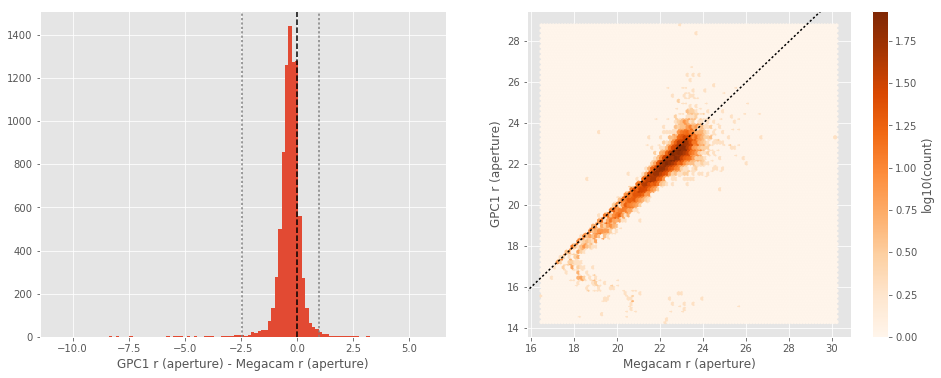

GPC1 r (total) - Megacam r (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -2.0470290756225586
- 99% percentile: 0.9979219818115239


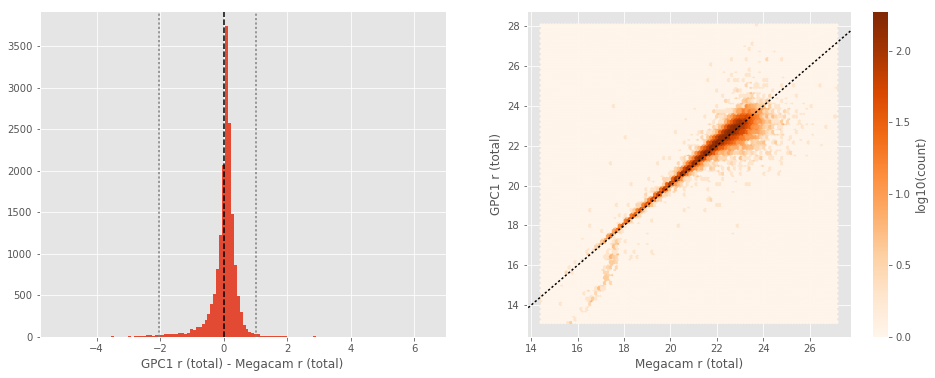

Megacam i (total) - WFC i (total):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -0.8999996185302734
- 99% percentile: 1.3543567276000994


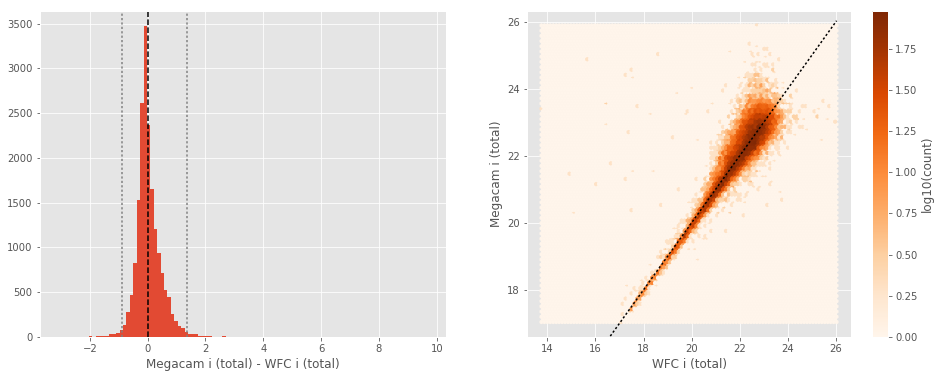

GPC1 i (aperture) - WFC i (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1170590400695801
- 99% percentile: 1.366484546661383


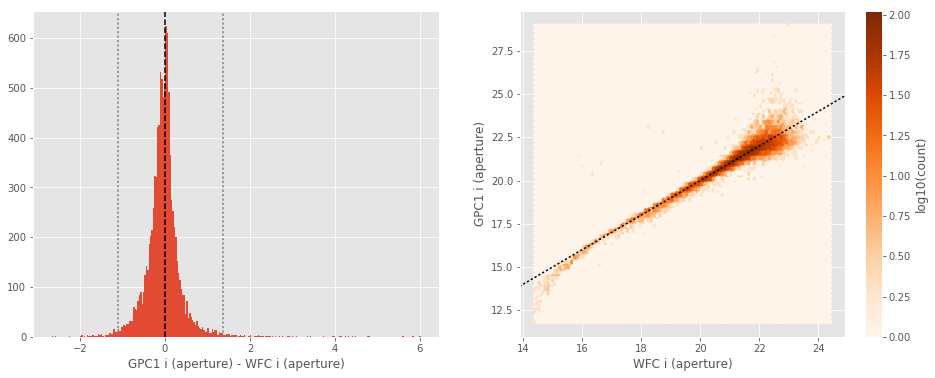

GPC1 i (total) - WFC i (total):
- Median: 0.07
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1527684020996092
- 99% percentile: 1.239436340332021


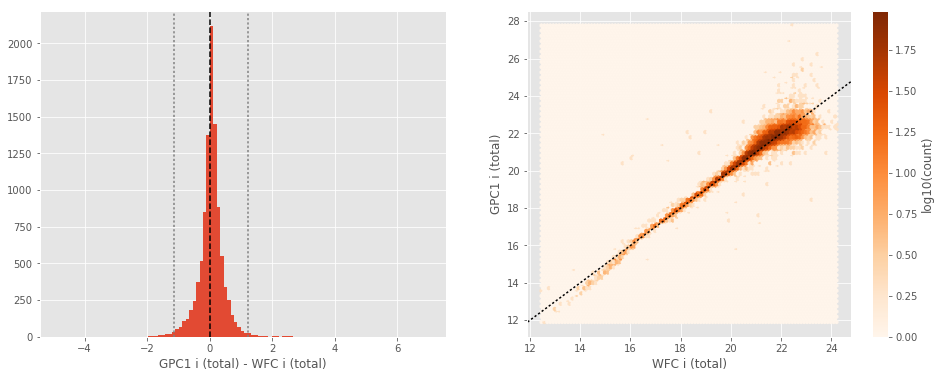

GPC1 i (total) - Megacam i (total):
- Median: 0.13
- Median Absolute Deviation: 0.16
- 1% percentile: -1.6433399200439454
- 99% percentile: 1.033504638671875


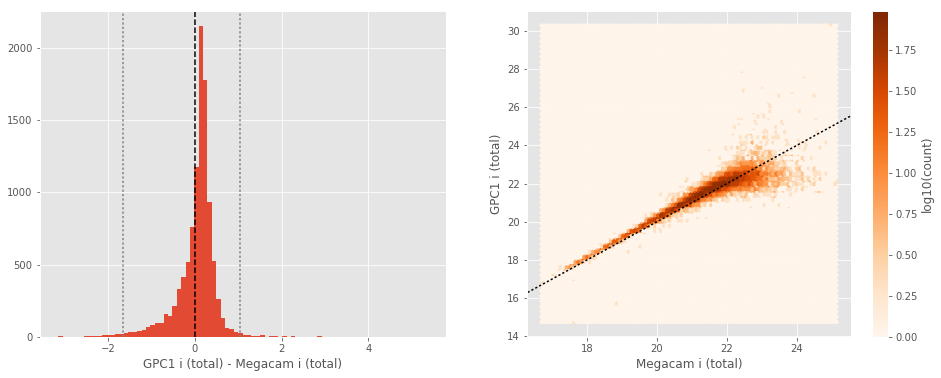

No sources have both WFC z (aperture) and Megacam z (aperture) values.
No sources have both WFC z (total) and Megacam z (total) values.
No sources have both WFC z (aperture) and GPC1 z (aperture) values.
No sources have both WFC z (total) and GPC1 z (total) values.
GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.28
- 1% percentile: -2.3576556205749513
- 99% percentile: 1.5895685386657696


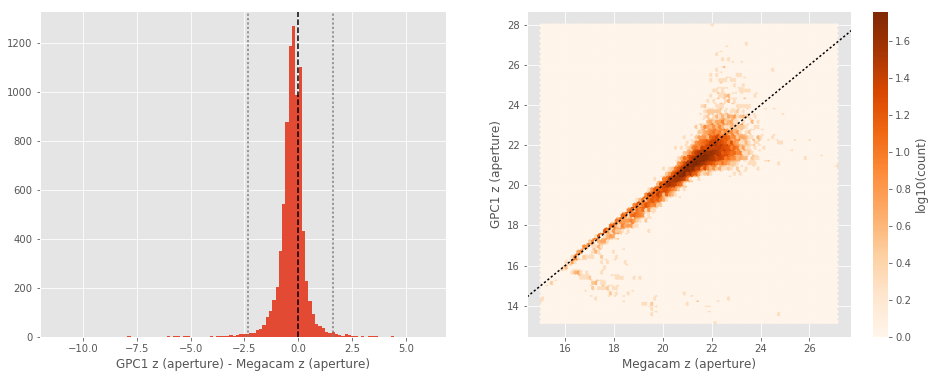

GPC1 z (total) - Megacam z (total):
- Median: 0.09
- Median Absolute Deviation: 0.22
- 1% percentile: -2.190757713317871
- 99% percentile: 1.6424225616455042


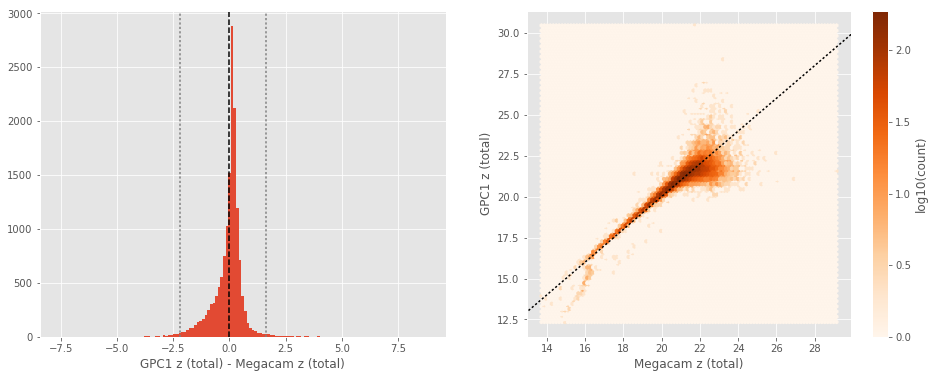

No sources have both Megacam y (total) and GPC1 y (total) values.


In [11]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        # RCS has no aperture magnitudes
        if ('megacam_i' not in basecol1 
            and 'megacam_i' not in basecol2 
            and 'megacam_y' not in basecol1
            and'megacam_y' not in basecol1):
            col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                            labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [12]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [13]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Lockman-SWIRE.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

No sources have both SDSS u (fiberMag) and WFC u (aperture) values.
No sources have both SDSS u (petroMag) and WFC u (total) values.
Megacam u (aperture) - SDSS u (fiberMag):
- Median: 0.04
- Median Absolute Deviation: 0.51
- 1% percentile: -1.6204073905944825
- 99% percentile: 3.237156677246091


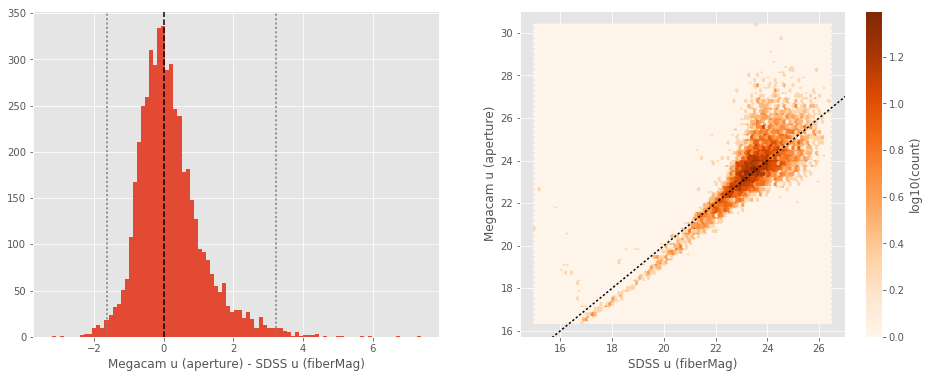

Megacam u (total) - SDSS u (petroMag):
- Median: 0.10
- Median Absolute Deviation: 0.81
- 1% percentile: -3.9559381103515623
- 99% percentile: 4.601758499145501


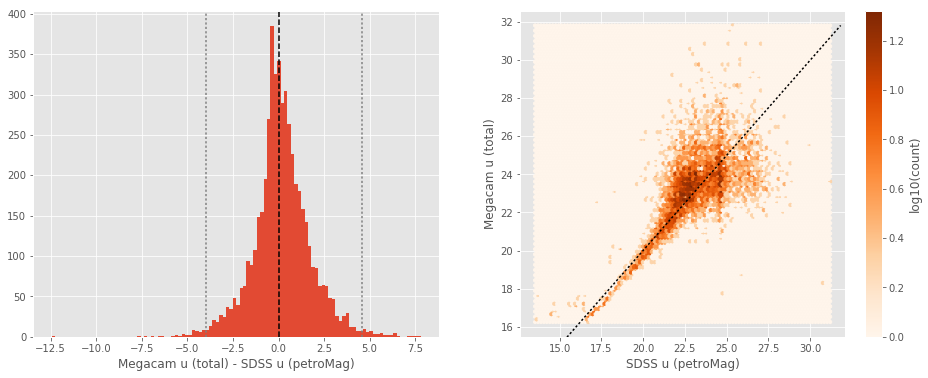

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0213998413085938
- 99% percentile: 0.34259757995605455


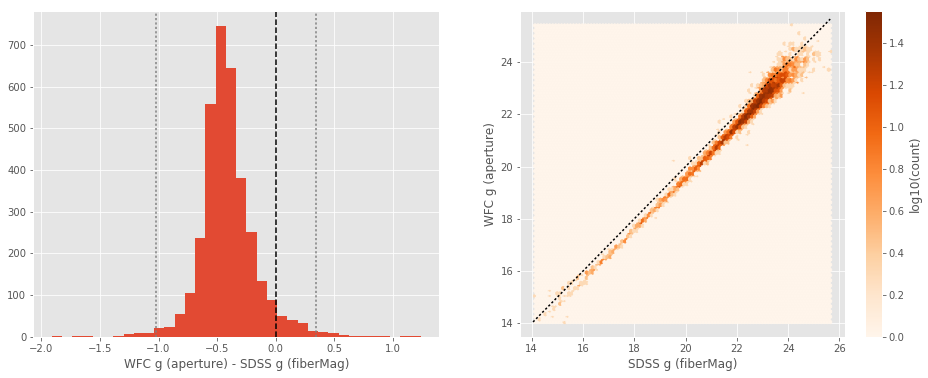

WFC g (total) - SDSS g (petroMag):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -2.870953998565674
- 99% percentile: 1.2419153785705548


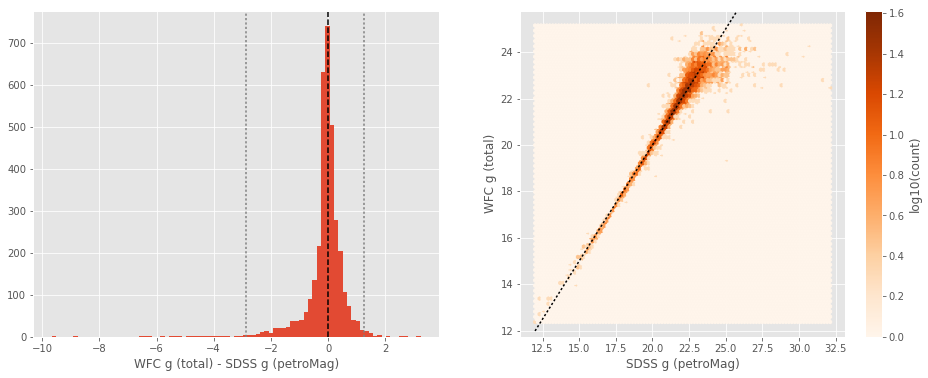

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.24
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9706473541259766
- 99% percentile: 1.2578904724121125


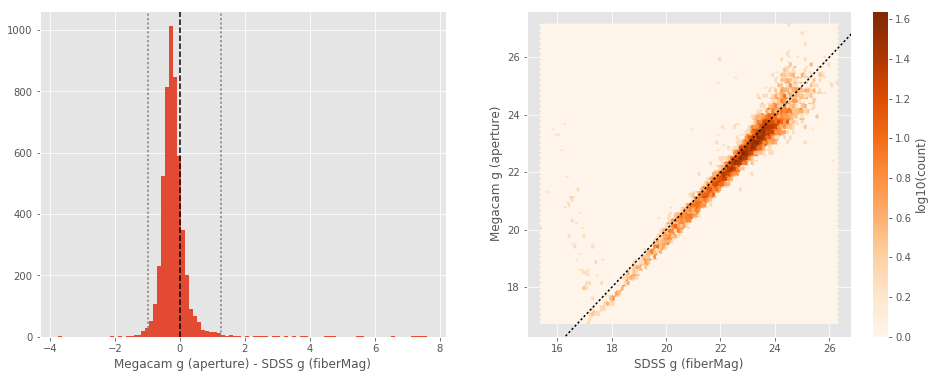

Megacam g (total) - SDSS g (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.28
- 1% percentile: -3.4499521255493164
- 99% percentile: 1.8184460067749022


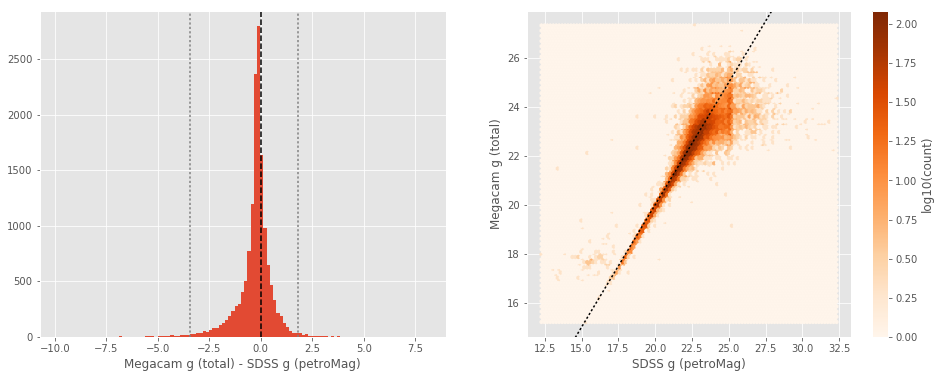

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.53
- Median Absolute Deviation: 0.23
- 1% percentile: -2.073658905029297
- 99% percentile: 1.6894358444213877


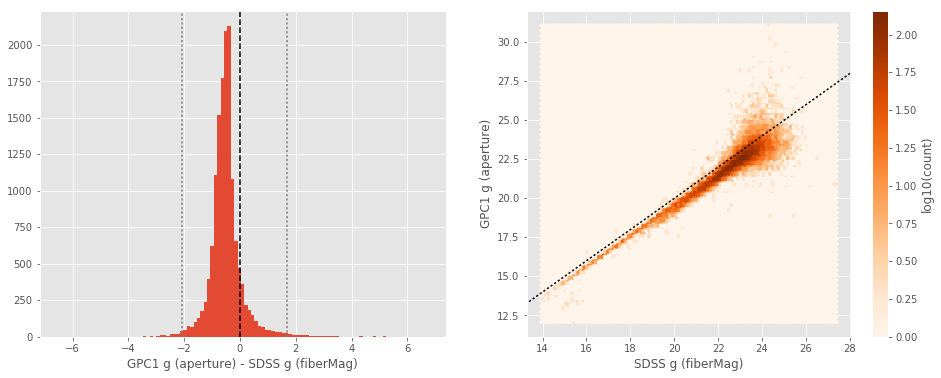

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.10
- Median Absolute Deviation: 0.26
- 1% percentile: -3.7099559402465823
- 99% percentile: 1.8070849037170416


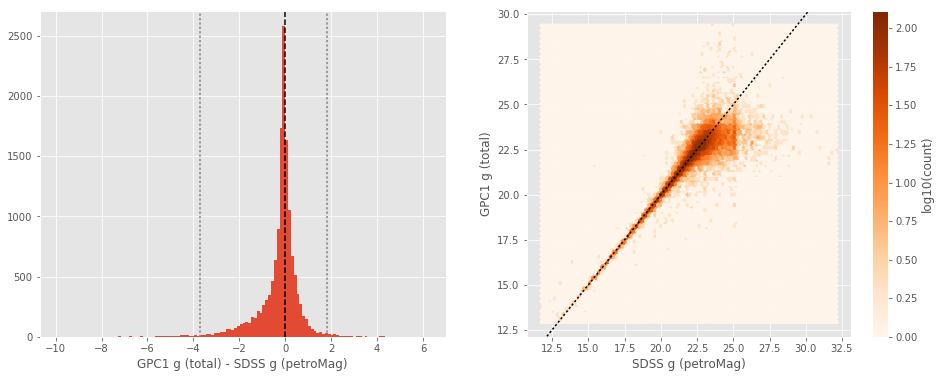

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9761717224121094
- 99% percentile: 0.31504284858703385


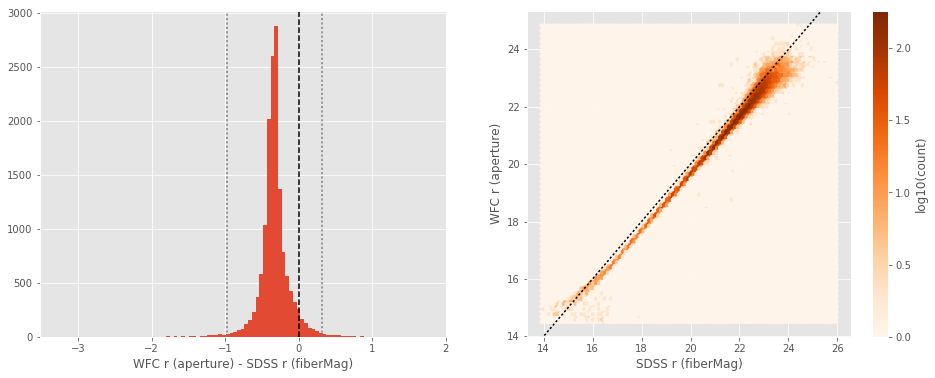

WFC r (total) - SDSS r (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.15
- 1% percentile: -2.7784935379028317
- 99% percentile: 1.1476733970642081


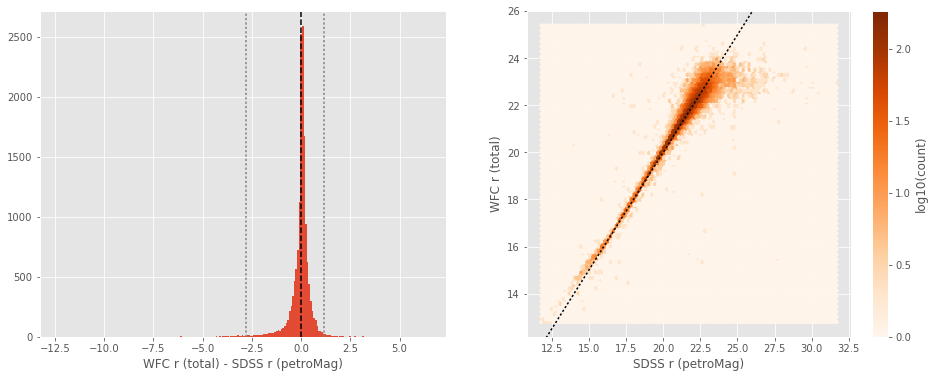

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.16
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8668159484863281
- 99% percentile: 2.5162319946289036


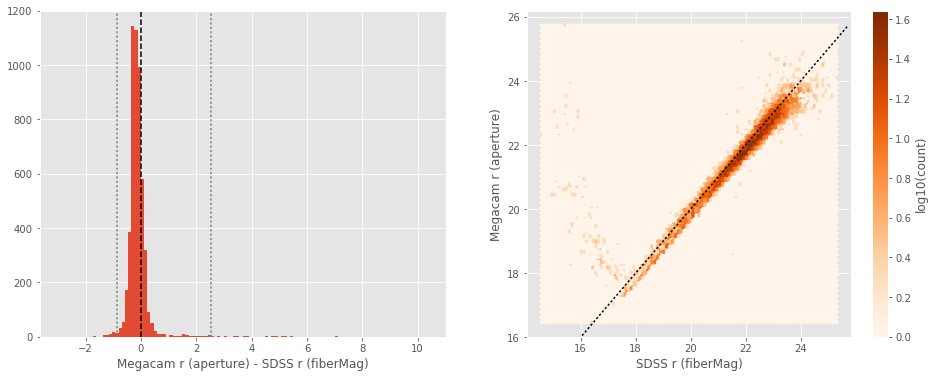

Megacam r (total) - SDSS r (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -2.844741916656494
- 99% percentile: 1.3133704566955573


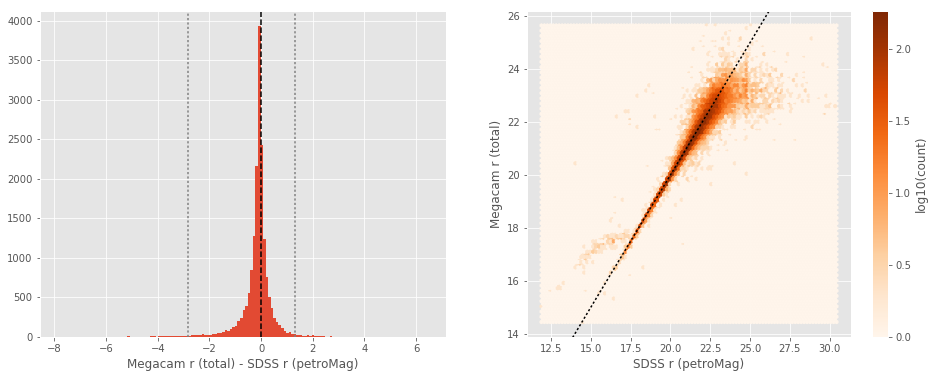

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2626590728759766
- 99% percentile: 0.6670398712158203


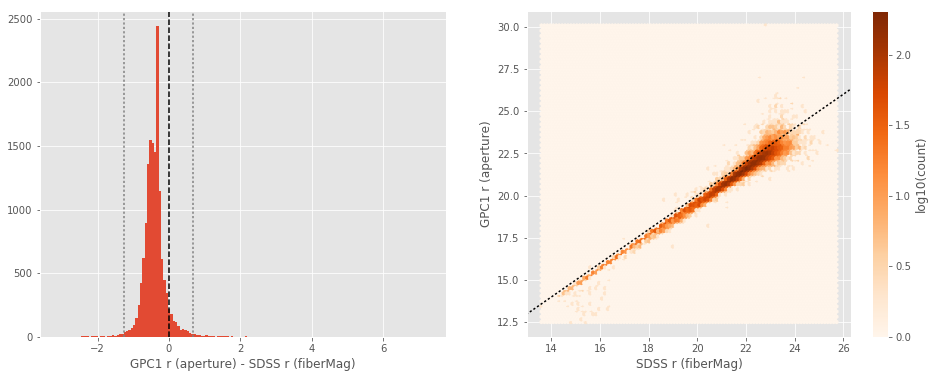

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.15
- 1% percentile: -2.5908880996704102
- 99% percentile: 1.2004919242858887


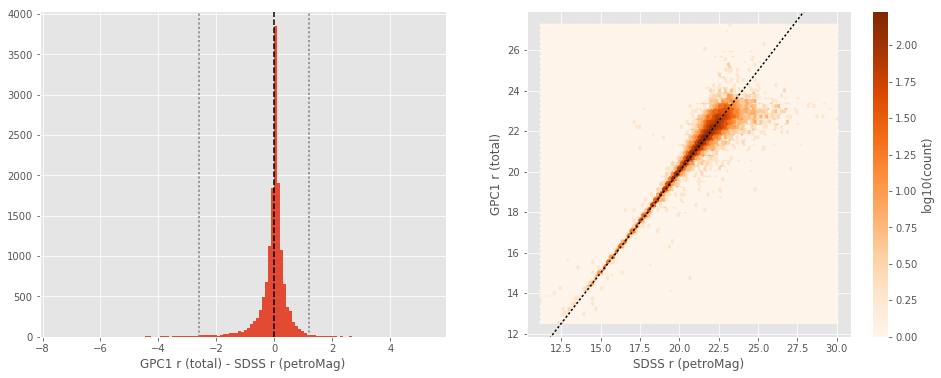

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -1.0136065864562989
- 99% percentile: 0.3811852645874021


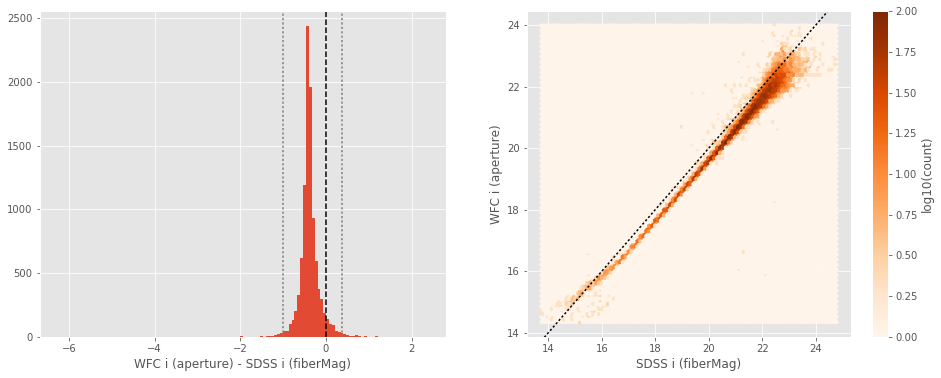

WFC i (total) - SDSS i (petroMag):
- Median: -0.03
- Median Absolute Deviation: 0.18
- 1% percentile: -3.075205478668213
- 99% percentile: 1.1216923141479471


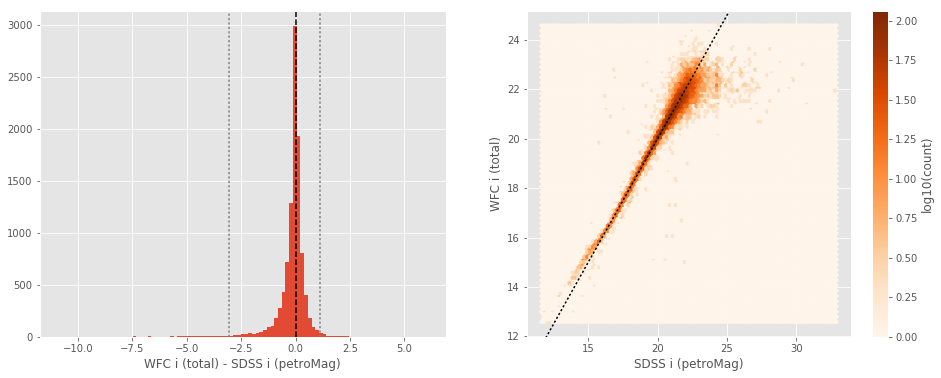

Megacam i (total) - SDSS i (petroMag):
- Median: -0.12
- Median Absolute Deviation: 0.16
- 1% percentile: -3.1933331298828125
- 99% percentile: 1.0214349365234394


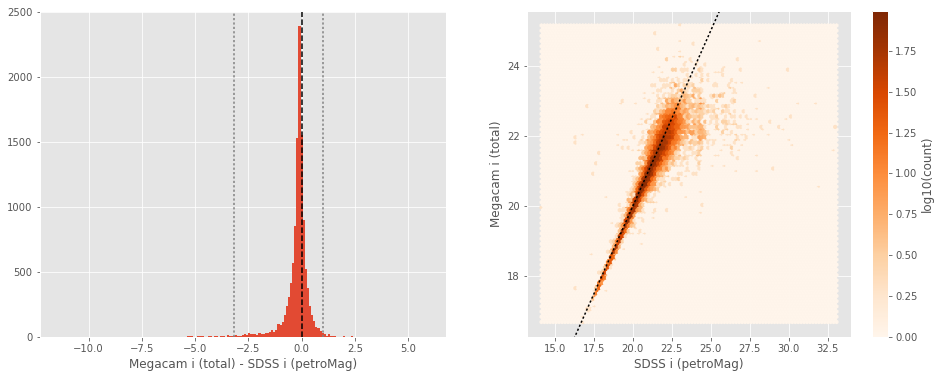

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2425081825256348
- 99% percentile: 0.6751223182678229


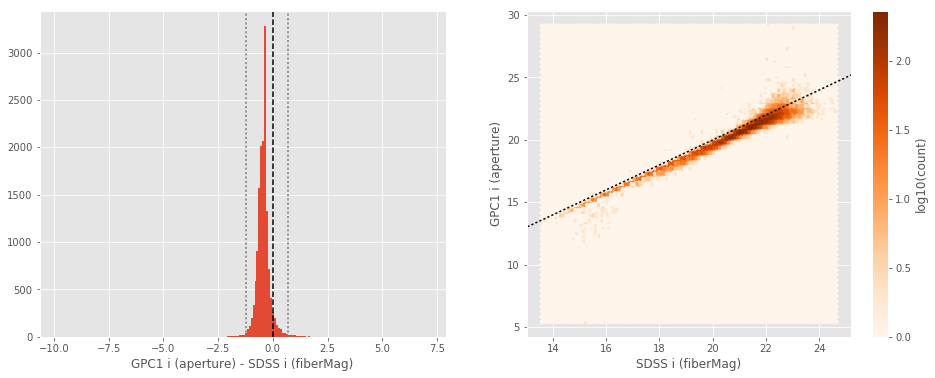

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -2.4607794189453127
- 99% percentile: 1.0083120727539034


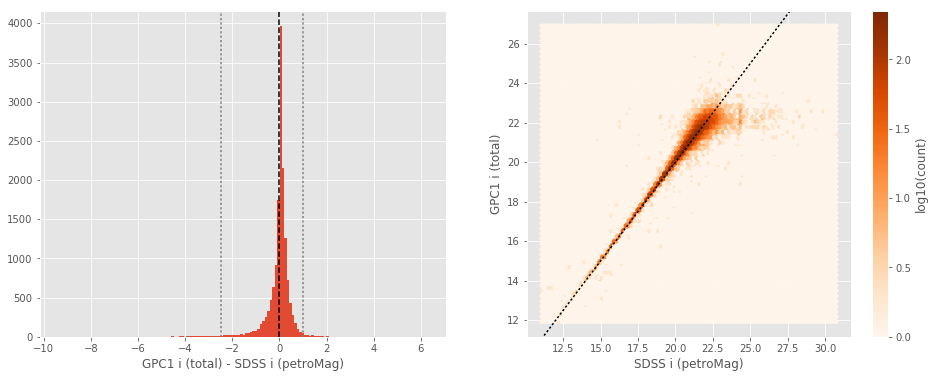

No sources have both SDSS z (fiberMag) and WFC z (aperture) values.
No sources have both SDSS z (petroMag) and WFC z (total) values.
Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.12
- Median Absolute Deviation: 0.21
- 1% percentile: -1.21006404876709
- 99% percentile: 1.9871367835998544


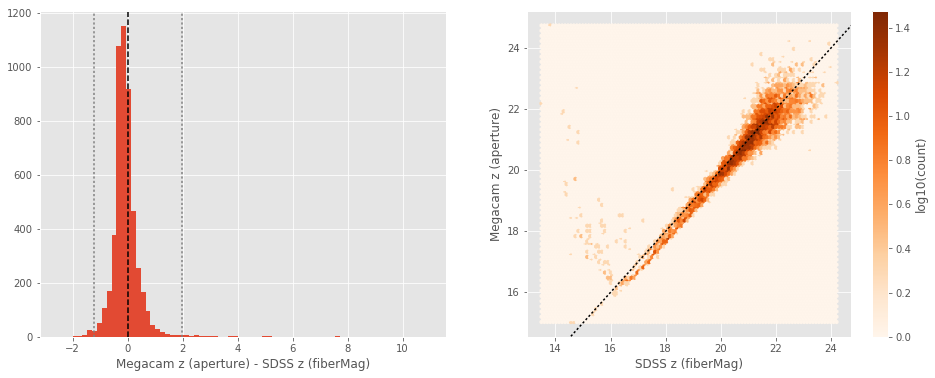

Megacam z (total) - SDSS z (petroMag):
- Median: -0.01
- Median Absolute Deviation: 0.38
- 1% percentile: -3.564286136627197
- 99% percentile: 2.0894472122192362


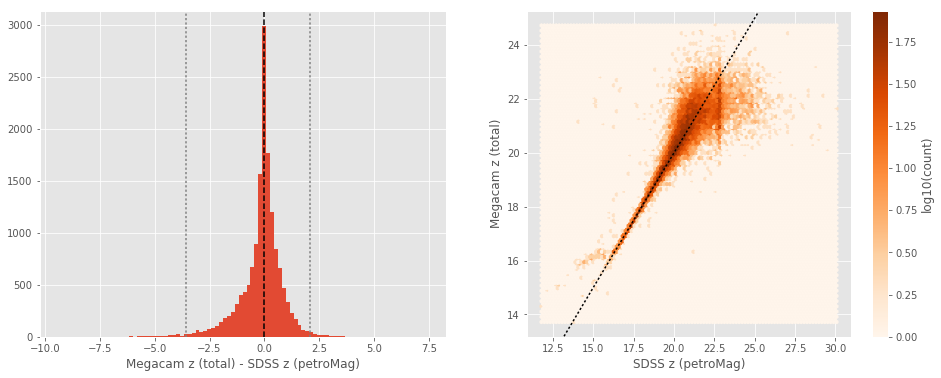

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.19
- 1% percentile: -1.4877844238281248
- 99% percentile: 1.3746660232543941


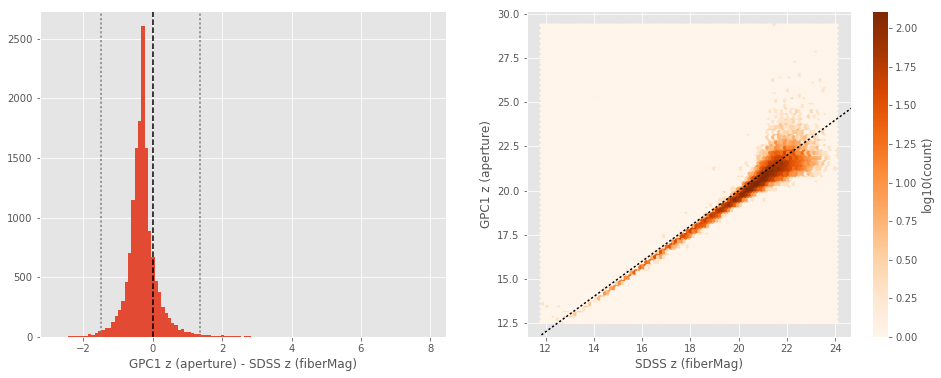

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.10
- Median Absolute Deviation: 0.31
- 1% percentile: -3.6135889053344723
- 99% percentile: 1.8850469589233383


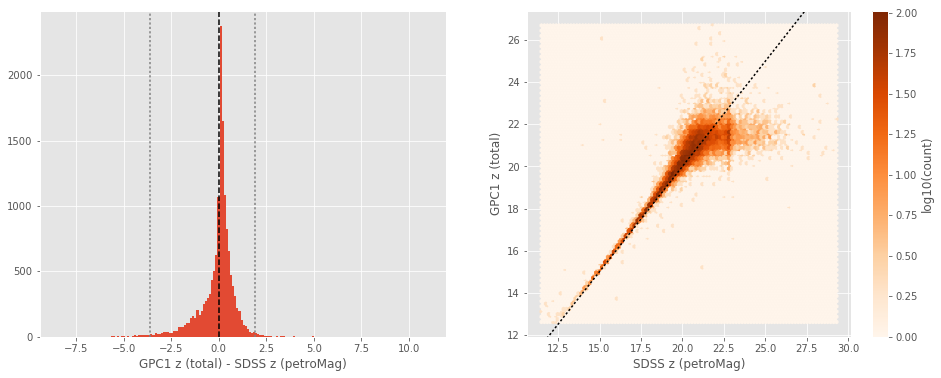

In [14]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
  
        if not 'megacam_i' in master_cat_mag_ap_colname:
            sdss_mag_ap = sdss[sdss_mag_ap_colname]
            master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
            nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                            labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [15]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [16]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Lockman-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WFCAM J (total) - 2MASS J:
- Median: 0.01
- Median Absolute Deviation: 0.06
- 1% percentile: -1.0177076533414666
- 99% percentile: 0.43008049592000747


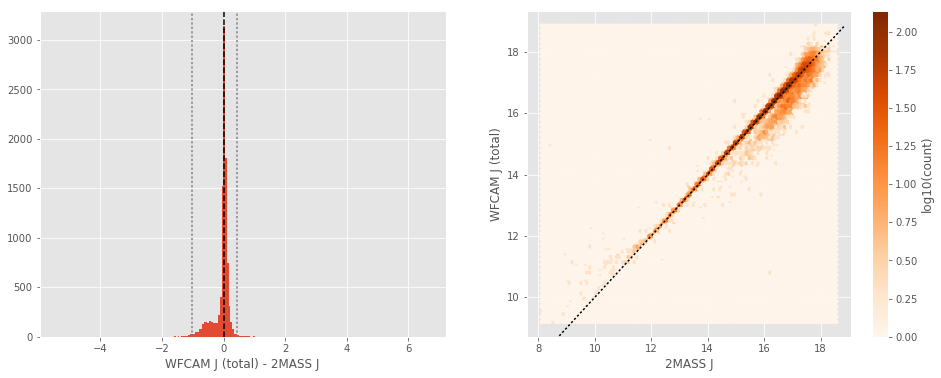

In [17]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "WFCAM J (total)"))

WFCAM Ks-like (total) - 2MASS Ks:
- Median: 0.07
- Median Absolute Deviation: 0.08
- 1% percentile: -0.7798549718340453
- 99% percentile: 0.8680143955365638


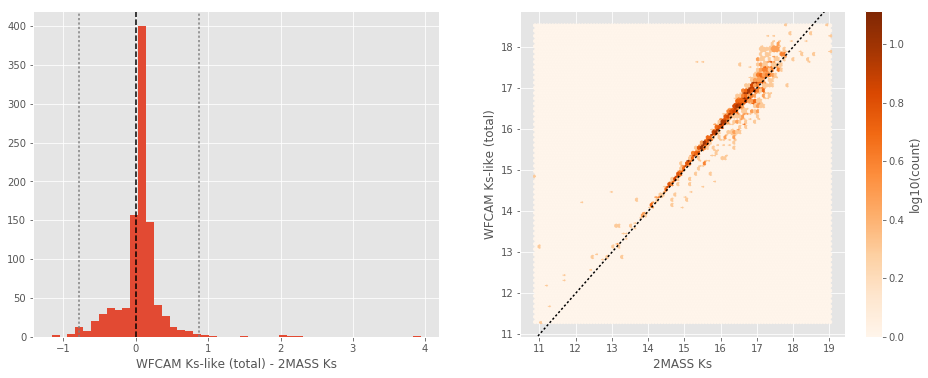

In [18]:
wfcam_ks_like = master_catalogue['m_wfcam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, wfcam_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "WFCAM Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [19]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 67493 / 545919 (12.36%)


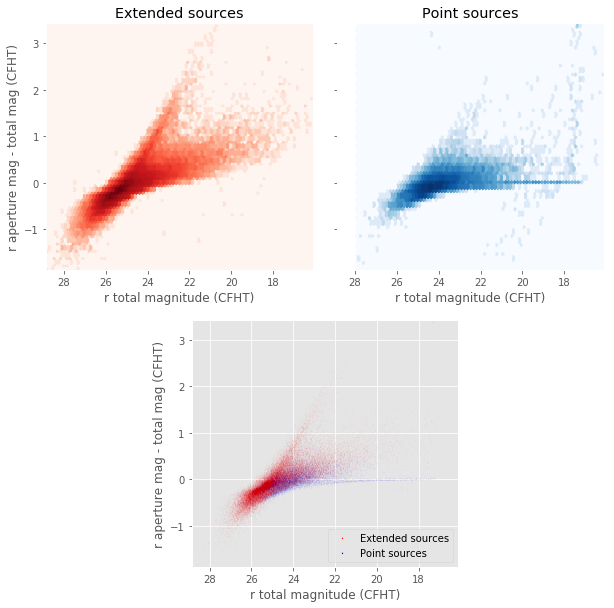

In [20]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 7239 / 545919 (1.33%)


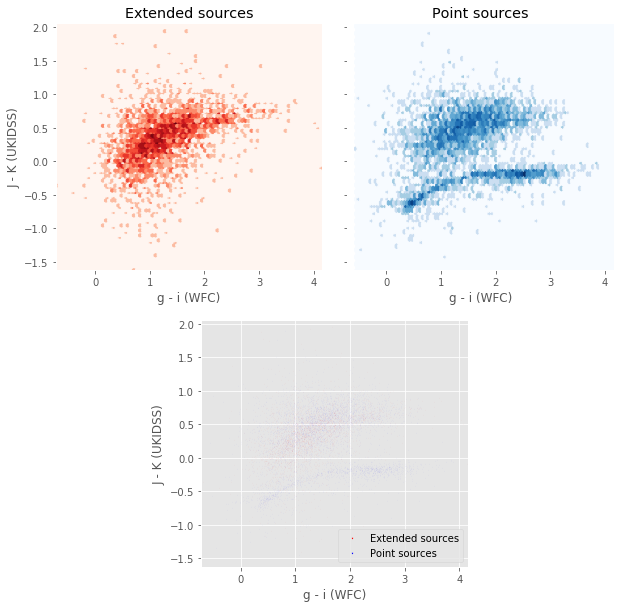

In [21]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    "g - i (WFC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 6845 / 545919 (1.25%)


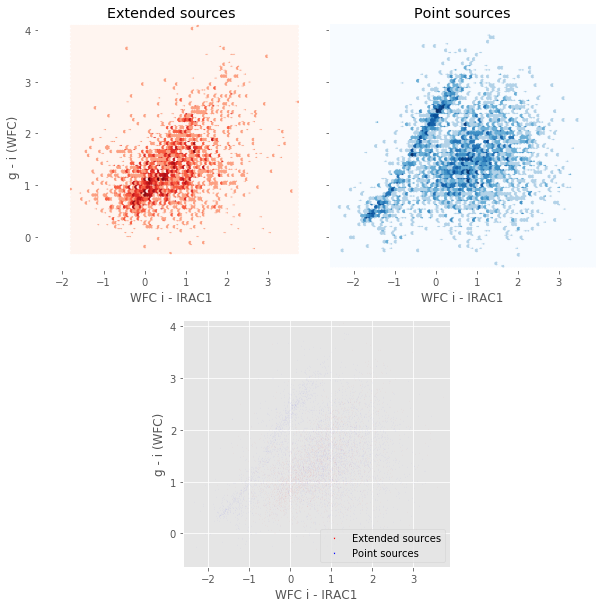

In [22]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 56844 / 545919 (10.41%)


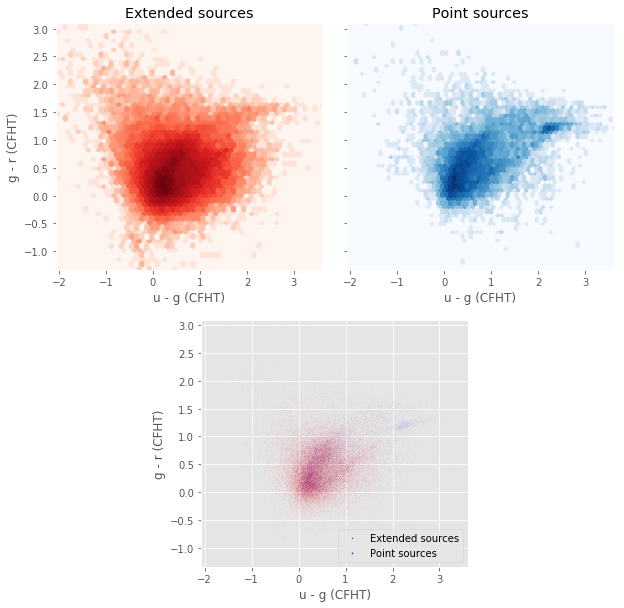

In [23]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 8600 / 545919 (1.58%)


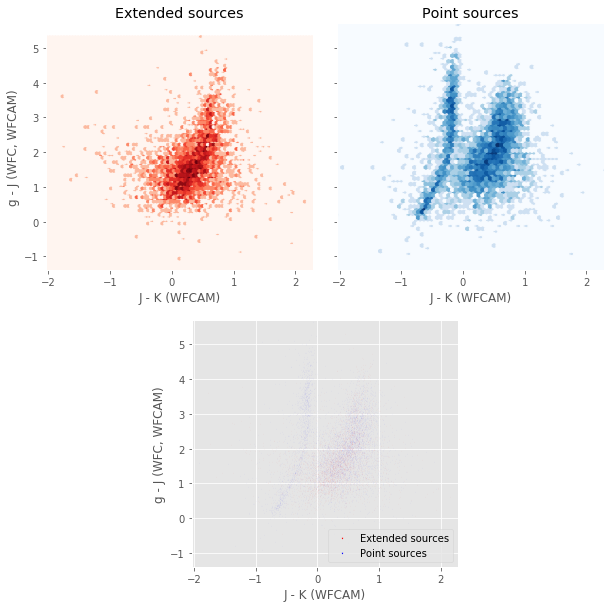

In [24]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfcam_j'],
    "J - K (WFCAM)", "g - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 7197 / 545919 (1.32%)


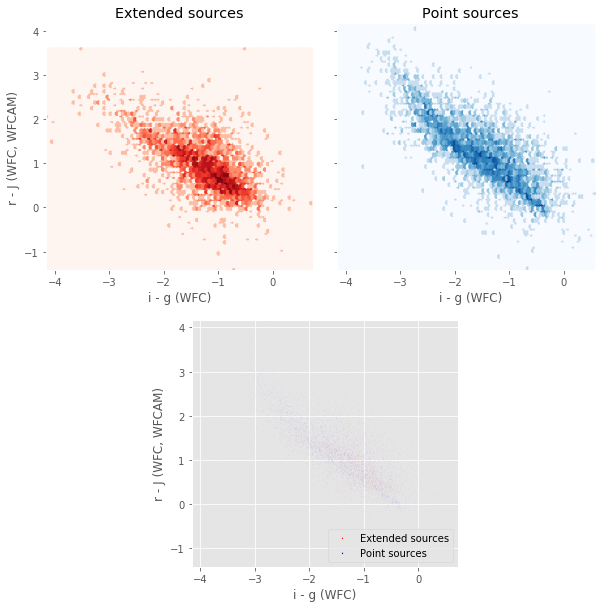

In [25]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_g'],
    master_catalogue['m_wfc_r'] - master_catalogue['m_wfcam_j'],
    "i - g (WFC)", "r - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 5425 / 545919 (0.99%)


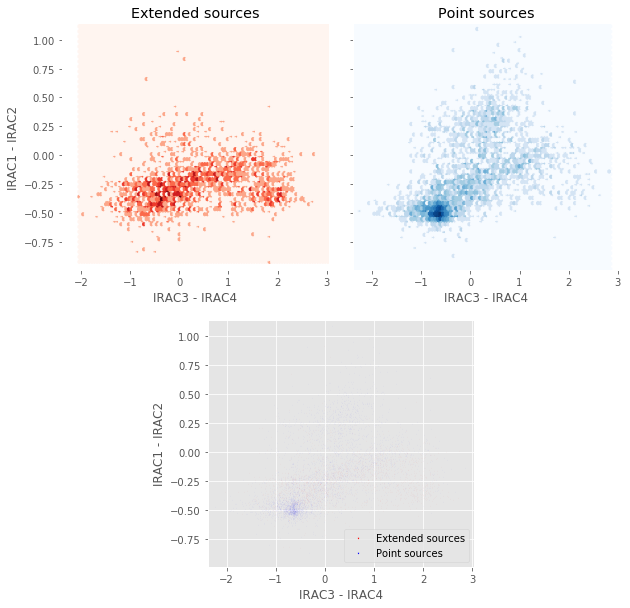

In [26]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)